In [10]:
# Import dependencies
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import os
import csv


# Data Preparation

In [2]:
# Generate population DataFrame from csv file
raw_pop_data = pd.read_csv("../data/pop.csv", encoding='unicode_escape')

# Remove unnecessary columns
raw_pop_data = raw_pop_data[["Country (or dependency)", "Population"]]

# Remove invalid entries (NaN)
pop_data = raw_pop_data.dropna()

# Rename columns
pop_data.columns = ["Country", "Population"]

In [3]:
# Generate age DataFrame from csv file
raw_age_data = pd.read_csv("../data/age.csv")

# Take the columns we want
raw_age_data = raw_age_data[["country", "MedianAge2023"]]

# Remove invalid entries (NaN)
age_data = raw_age_data.dropna()

# Rename columns
age_data.columns = ["Country", "Median Age"]

In [4]:
# Generate GDP DataFrame from csv file
raw_gdp_data = pd.read_csv("../data/gdp.csv")
raw_gdp_data

# Take the columns we want
raw_gdp_data = raw_gdp_data[["country", "GdpPerCapitaIMF_USD_23"]]

# Remove invalid entries (NaN)
gdp_data = raw_gdp_data.dropna()

# Rename columns
gdp_data.columns = ["Country", "GDP Per Capita (USD)"]

In [5]:
# Generate Facebook DataFrame from csv file
raw_fb_data = pd.read_csv("../data/facebook.csv")

# Take columns we want
fb_data = raw_fb_data[["country", "FacebookUsersTotal2023"]]

# Rename columns
fb_data.columns = ["Country", "Facebook Users"]

In [6]:
# Generate TikTok DataFrame from csv file
tt_data = pd.read_csv("../data/tiktok.csv")

# Rename columns
tt_data.columns = ["Country", "TikTok Users"]


In [7]:
# Generate YouTube DataFrame from csv file
raw_yt_data = pd.read_csv("../data/youtube.csv")

# Take columns we want
yt_data = raw_yt_data[["country", "YouTubeUsersJuly2023"]]

# Rename columns
yt_data.columns = ["Country", "YouTube Users"]

# Since users is measured in units of millions, we need to convert
yt_data["YouTube Users"] = yt_data['YouTube Users']*1000000

C:\Users\3aama\AppData\Local\Temp\ipykernel_1884\576258242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt_data["YouTube Users"] = yt_data['YouTube Users']*1000000


In [8]:
# We need to merge our DataFrames
population_statistics = pop_data.merge(gdp_data, how="inner", on="Country").merge(age_data, how="inner", on="Country")

# Convert columns to numbers
population_statistics["Population"] = population_statistics["Population"].replace({'\$':'',',':''}, regex = True)
population_statistics["Population"] = population_statistics["Population"].astype(int)

# Drop rows with invalid entries
population_statistics.dropna()

population_statistics.head()

,Country,Population,GDP Per Capita (USD),Median Age
0,India,1428627663,2612.45,29.5
1,China,1425671352,12541.40,39.8
2,United States,339996563,80412.41,38.5
3,Indonesia,277534122,5108.94,31.2
4,Pakistan,240485658,1471.10,22.7


In [9]:
# Add Facebook user data to our DataFrame
fb_data_complete = population_statistics.merge(fb_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
fb_data_complete["% of Population"] = fb_data_complete["Facebook Users"]/fb_data_complete["Population"]

fb_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,Facebook Users,% of Population
0,India,1428627663,2612.45,29.5,314600000,0.220211
1,United States,339996563,80412.41,38.5,175000000,0.514711
2,Indonesia,277534122,5108.94,31.2,119900000,0.432019
3,Pakistan,240485658,1471.10,22.7,37300000,0.155103
4,Nigeria,223804632,1755.33,19.2,21750000,0.097183


In [10]:
# Add TikTok user data to our DataFrame
tt_data_complete = population_statistics.merge(tt_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
tt_data_complete["% of Population"] = tt_data_complete["TikTok Users"]/tt_data_complete["Population"]

tt_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,TikTok Users,% of Population
0,United States,339996563,80412.41,38.5,113300000,0.333239
1,Indonesia,277534122,5108.94,31.2,109900000,0.395987
2,Pakistan,240485658,1471.10,22.7,16510000,0.068653
3,Brazil,216422446,10413.00,34.7,82210000,0.379859
4,Russia,144444359,13005.71,41.5,54860000,0.379800


In [11]:
# Add YouTube user data to our DataFrame
yt_data_complete = population_statistics.merge(yt_data, how="inner", on="Country")

# Add a column for percentage of total population on Facebook
yt_data_complete["% of Population"] = yt_data_complete["YouTube Users"]/yt_data_complete["Population"]

yt_data_complete.head()

,Country,Population,GDP Per Capita (USD),Median Age,YouTube Users,% of Population
0,India,1428627663,2612.45,29.5,467000000.0,0.326887
1,United States,339996563,80412.41,38.5,246000000.0,0.723537
2,Indonesia,277534122,5108.94,31.2,139000000.0,0.500839
3,Pakistan,240485658,1471.10,22.7,71700000.0,0.298147
4,Nigeria,223804632,1755.33,19.2,31600000.0,0.141195


# Data Visualization

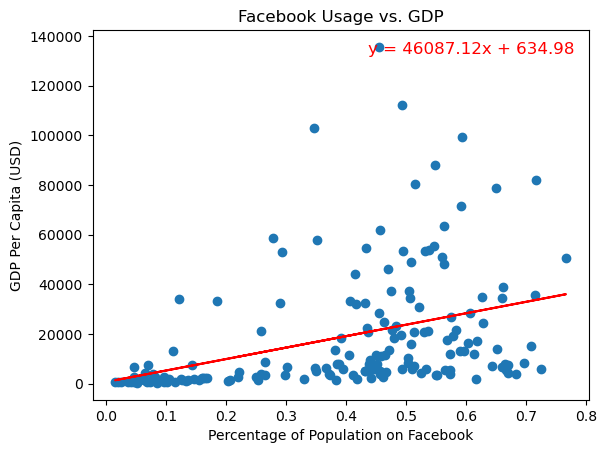

In [12]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_complete["% of Population"], fb_data_complete["GDP Per Capita (USD)"])
regress_values = fb_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_complete["% of Population"], fb_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(fb_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. GDP")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("GDP Per Capita (USD)")
plt.savefig('fio')
plt.show()

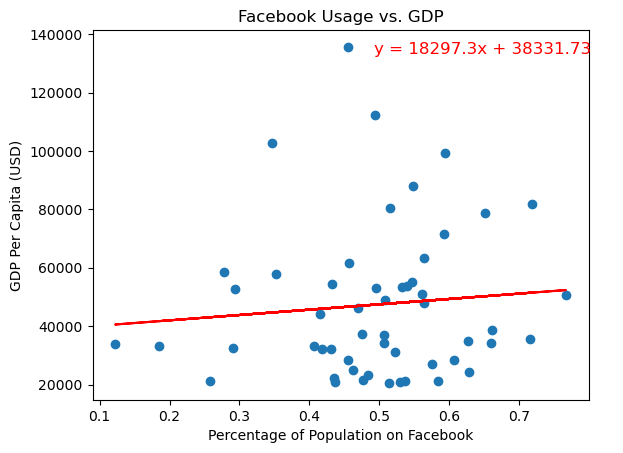

In [14]:
# What if we repeated this exercise, but only with countries that have a GDP of 20k or higher?
fb_data_sort_gdp = fb_data_complete.loc[fb_data_complete['GDP Per Capita (USD)'] > 20000]

# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_sort_gdp["% of Population"], fb_data_sort_gdp["GDP Per Capita (USD)"])
regress_values = fb_data_sort_gdp["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_sort_gdp["% of Population"], fb_data_sort_gdp["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(fb_data_sort_gdp["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. GDP")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

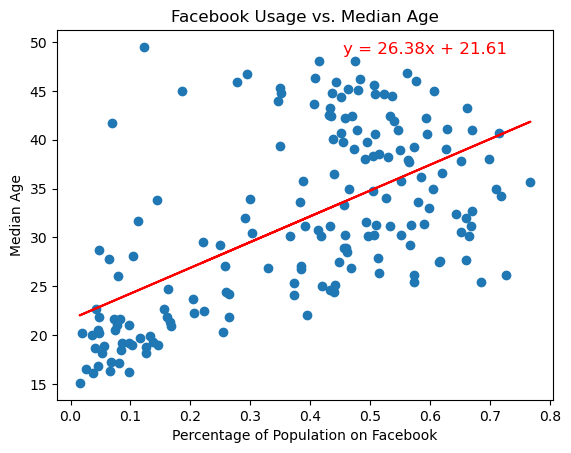

In [57]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_complete["% of Population"], fb_data_complete["Median Age"])
regress_values = fb_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_complete["% of Population"], fb_data_complete["Median Age"])

# Add line of best fit
plt.plot(fb_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. Median Age")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("Median Age")
plt.show()

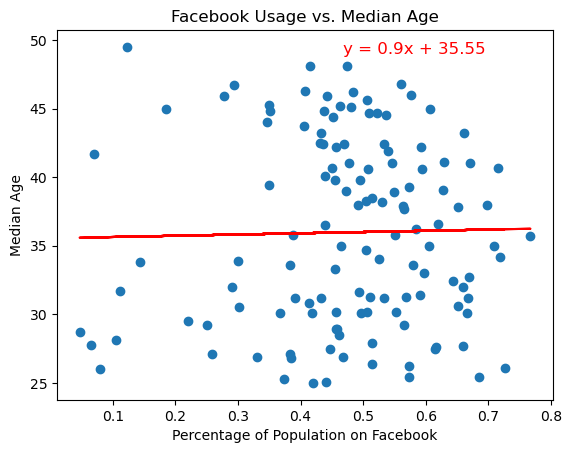

In [16]:
# Let's try a similar exercise as above, plotting the data with only median ages 25 or older
fb_data_sort_age = fb_data_complete.loc[fb_data_complete["Median Age"] >= 25]

# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(fb_data_sort_age["% of Population"], fb_data_sort_age["Median Age"])
regress_values = fb_data_sort_age["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(fb_data_sort_age["% of Population"], fb_data_sort_age["Median Age"])

# Add line of best fit
plt.plot(fb_data_sort_age["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("Facebook Usage vs. Median Age")
plt.xlabel("Percentage of Population on Facebook")
plt.ylabel("Median Age")
plt.show()

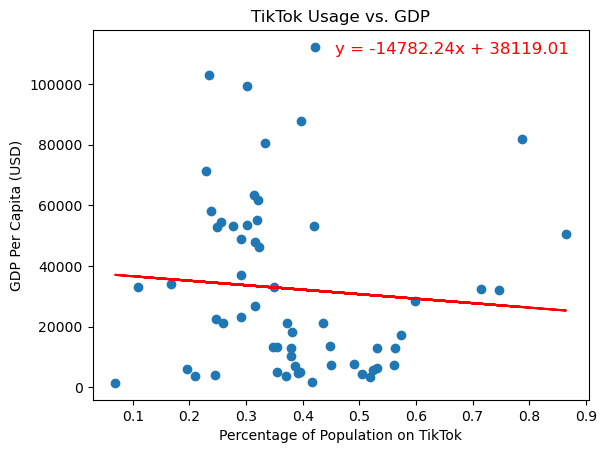

In [60]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_complete["% of Population"], tt_data_complete["GDP Per Capita (USD)"])
regress_values = tt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_complete["% of Population"], tt_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(tt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.55,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. GDP")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

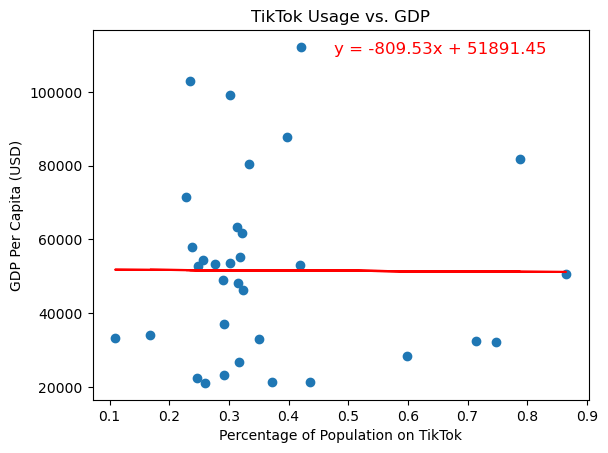

-0.005782533732220709


In [20]:
# Again, let's constrict our analysis to countries with GDPs of over 20000
tt_data_sort_gdp = tt_data_complete.loc[tt_data_complete['GDP Per Capita (USD)'] > 20000]

# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_sort_gdp["% of Population"], tt_data_sort_gdp["GDP Per Capita (USD)"])
regress_values = tt_data_sort_gdp["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_sort_gdp["% of Population"], tt_data_sort_gdp["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(tt_data_sort_gdp["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.55,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. GDP")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

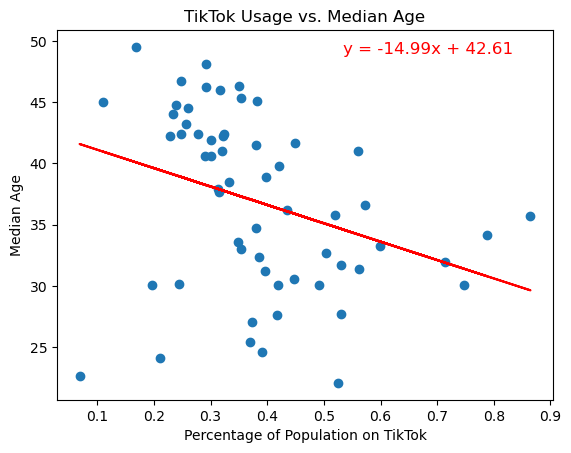

In [61]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_complete["% of Population"], tt_data_complete["Median Age"])
regress_values = tt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_complete["% of Population"], tt_data_complete["Median Age"])

# Add line of best fit
plt.plot(tt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. Median Age")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("Median Age")
plt.show()

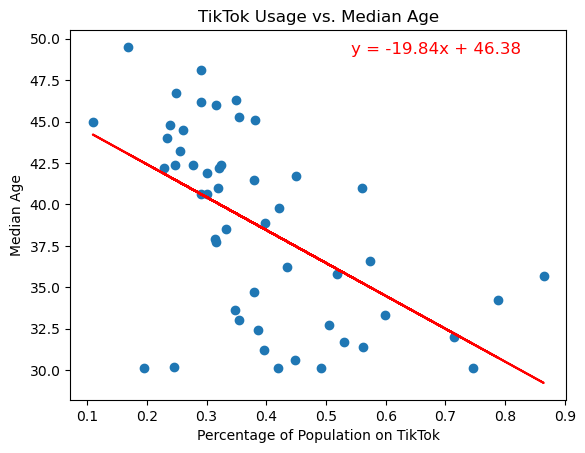

-0.5462792897255478


In [19]:
# Restrict to median ages greater than or equal to 30
tt_data_sort_age = tt_data_complete.loc[tt_data_complete['Median Age'] >= 30]

# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(tt_data_sort_age["% of Population"], tt_data_sort_age["Median Age"])
regress_values = tt_data_sort_age["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(tt_data_sort_age["% of Population"], tt_data_sort_age["Median Age"])

# Add line of best fit
plt.plot(tt_data_sort_age["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.6,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("TikTok Usage vs. Median Age")
plt.xlabel("Percentage of Population on TikTok")
plt.ylabel("Median Age")
plt.show()

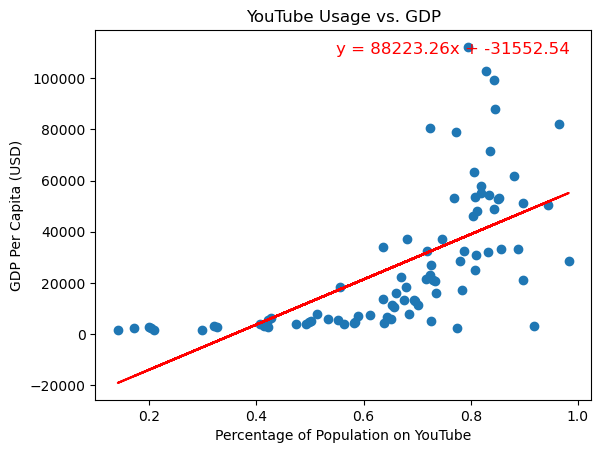

In [63]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(yt_data_complete["% of Population"], yt_data_complete["GDP Per Capita (USD)"])
regress_values = yt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(yt_data_complete["% of Population"], yt_data_complete["GDP Per Capita (USD)"])

# Add line of best fit
plt.plot(yt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.55,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("YouTube Usage vs. GDP")
plt.xlabel("Percentage of Population on YouTube")
plt.ylabel("GDP Per Capita (USD)")
plt.show()

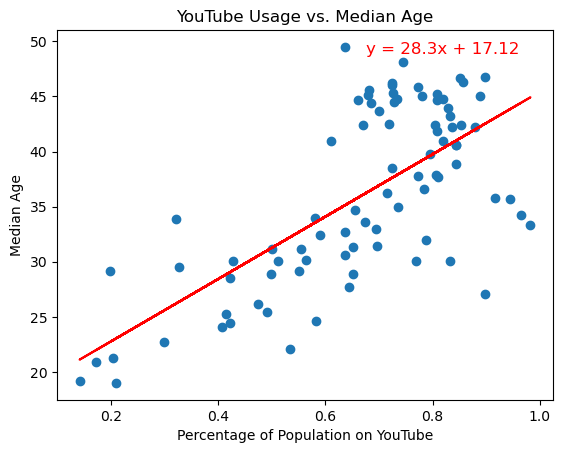

In [66]:
# Calculate line of best fit (code taken from week 5 exercise)
(slope, intercept, rvalue, pvalue, stderr) = linregress(yt_data_complete["% of Population"], yt_data_complete["Median Age"])
regress_values = yt_data_complete["% of Population"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data
plt.scatter(yt_data_complete["% of Population"], yt_data_complete["Median Age"])

# Add line of best fit
plt.plot(yt_data_complete["% of Population"],regress_values,"r-")
plt.annotate(line_eq,(0.65,0.88),fontsize=12,color="red", xycoords="subfigure fraction")

# Label chart
plt.title("YouTube Usage vs. Median Age")
plt.xlabel("Percentage of Population on YouTube")
plt.ylabel("Median Age")
plt.show()

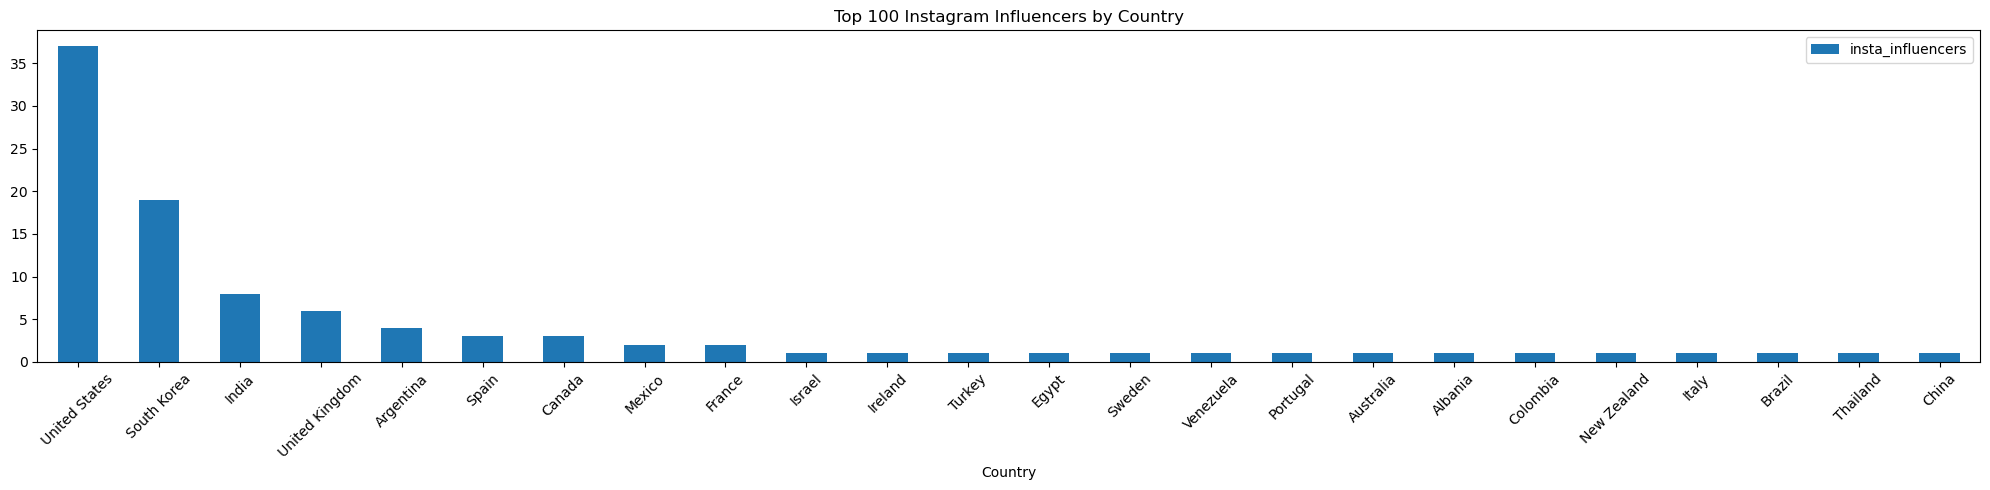

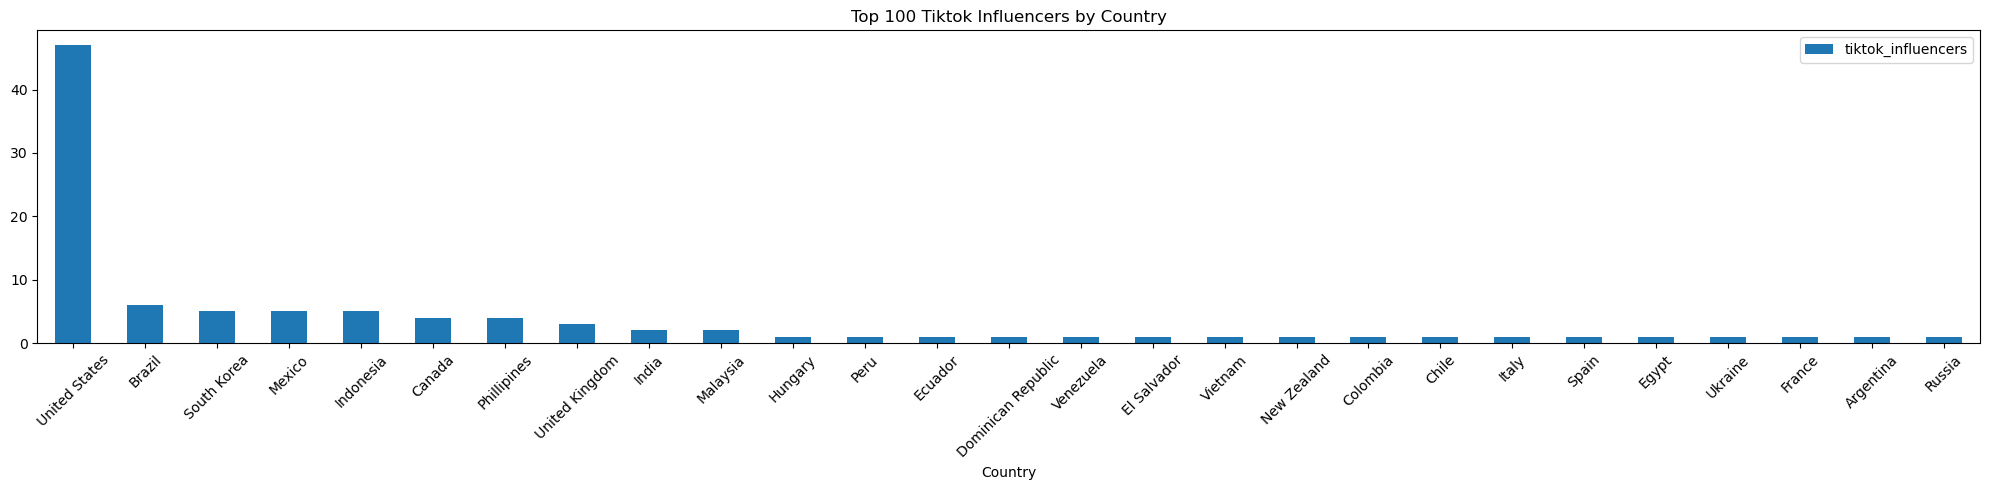

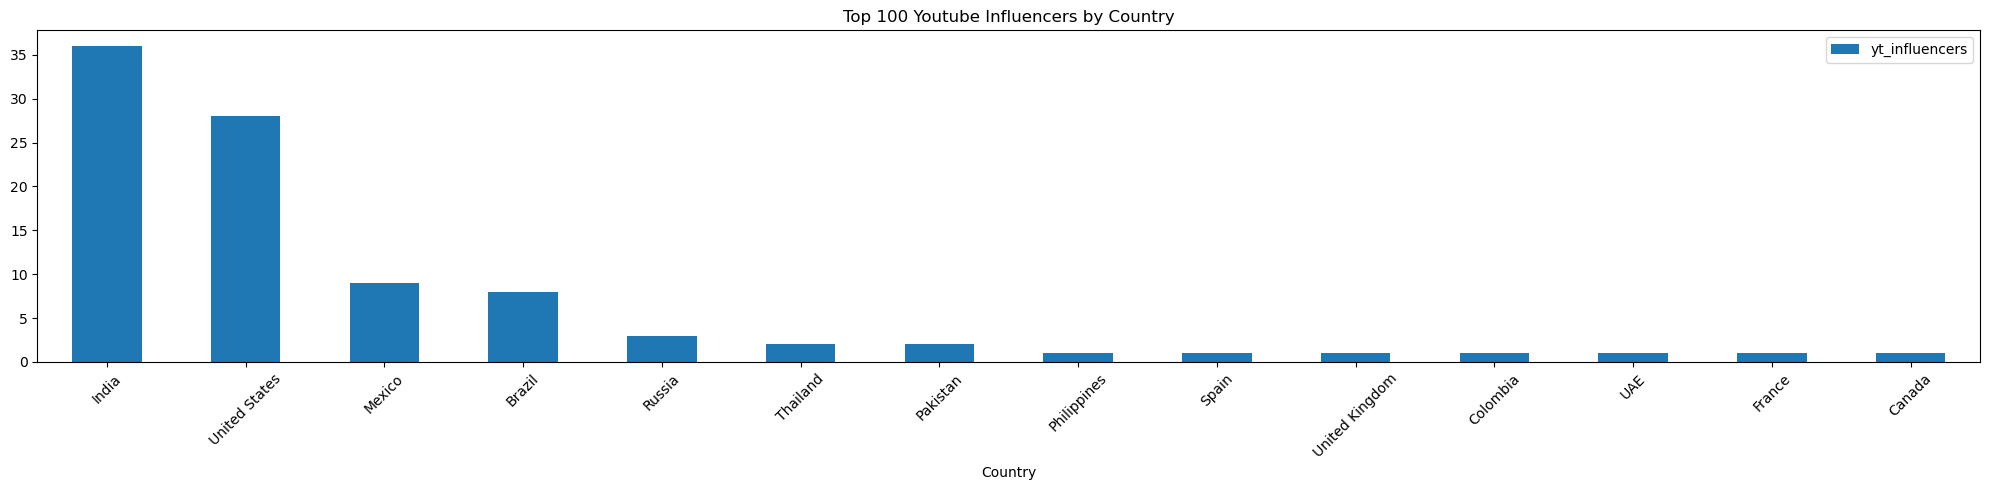

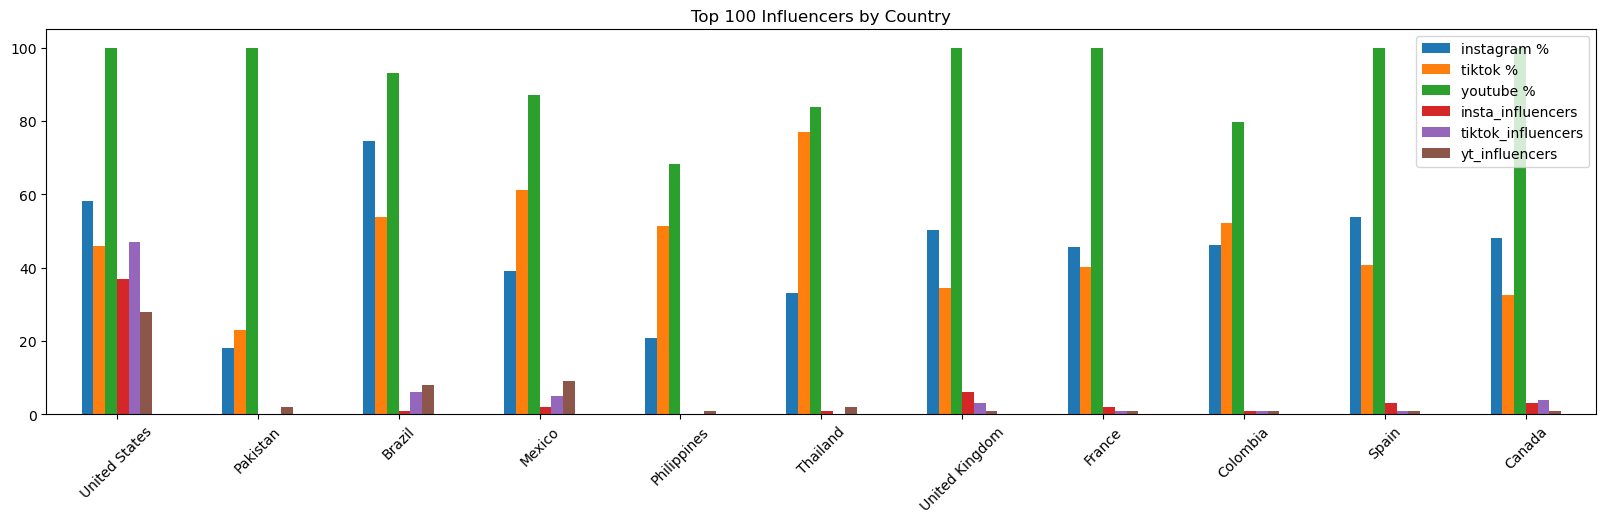

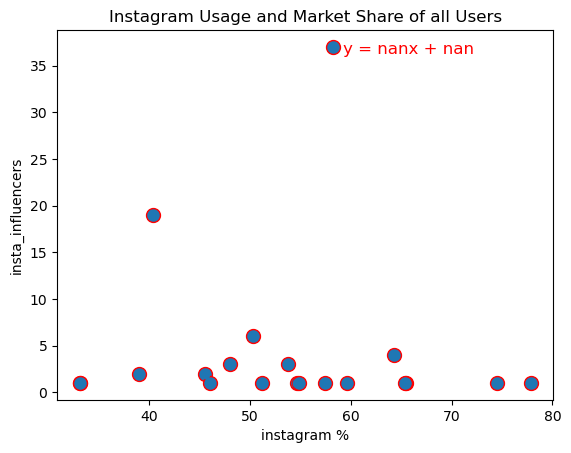

Instagram users as a % of social media users vs suicide R value: -0.04
Tiktok users as a % of social media users vs suicide R value: -0.56


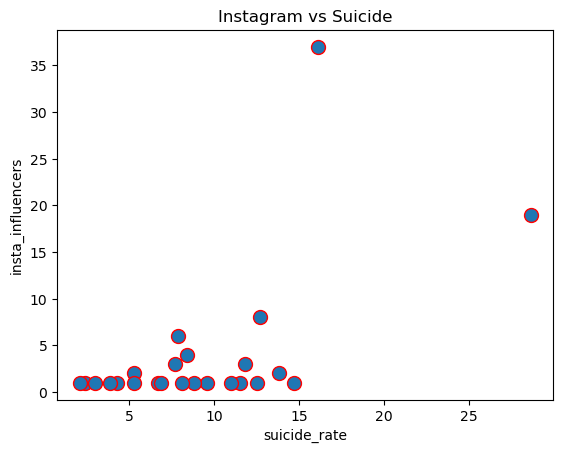

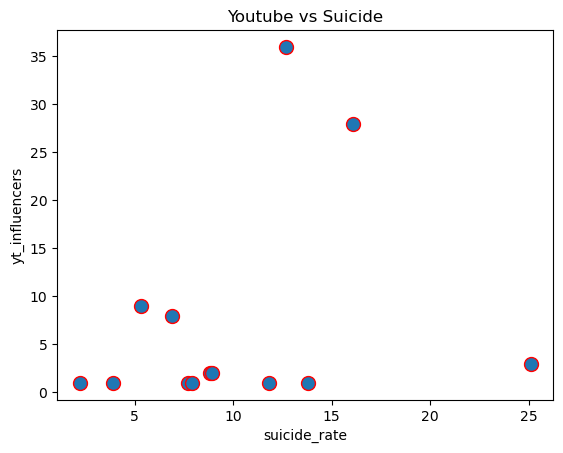

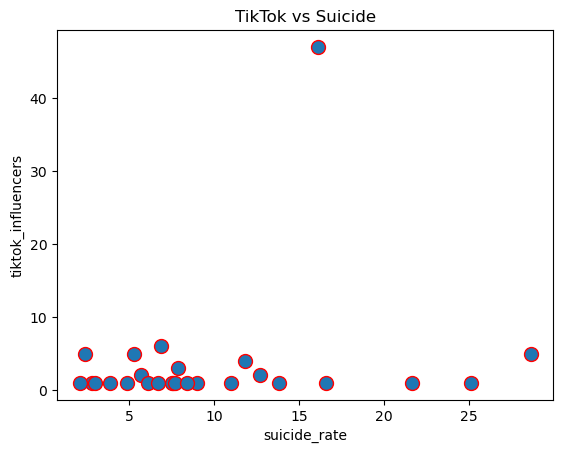

In [24]:
path = '..\\data\\'
mktsmall = pd.read_csv(rf'{path}\facebook.csv')
csvs = ['youtube', 'tiktok', 'world', 'instagram']
for x in csvs:
    csv = pd.read_csv(f'{path}\{x}.csv')
    tdf = pd.DataFrame(csv)
    mktsmall = mktsmall.merge(tdf, how='inner', on="country")

# creating new columns
mktsmall["tiktok %"] = round((mktsmall['TikTokUsersCountryTotal2023'] / mktsmall["users"] * 100), 2)
mktsmall["youtube %"] = round((mktsmall['YouTubeUsersJuly2023'] / mktsmall["users"] * 100), 2)
mktsmall["facebook %"] = round((mktsmall['FacebookUsersTotal2023'] / mktsmall["users"] * 100), 2)
mktsmall["instagram %"] = round((mktsmall['InstagramUsers2023'] / mktsmall["users"] * 100), 2)
# data frames used for plots later
plotdf = mktsmall[["instagram %", "country"]]
plotbdf = mktsmall[["tiktok %", "country"]]

# resetting index so influencers by country of origin is a colunn
idf = pd.read_csv(rf'{path}\top_1000_instagramers.csv')
idf = idf["country"].value_counts().reset_index()
idf = idf.rename(columns={'count': 'insta_influencers'})

# Bargraphs of influencers by country
plot = idf.plot(kind="bar", figsize=(20, 5))
plot.set_xticklabels(idf["country"], rotation=45)
plt.title("Top 100 Instagram Influencers by Country")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

tdf = pd.read_csv(rf'{path}\top_1000_tiktok.csv')
tdf = tdf["country"].value_counts().reset_index()
tdf = tdf.rename(columns={'count': 'tiktok_influencers'})

plot = tdf.plot(kind="bar", figsize=(20, 5))
plot.set_xticklabels(tdf["country"], rotation=45)
plt.title("Top 100 Tiktok Influencers by Country")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

ydf = pd.read_csv(rf'{path}\top_1000_yt.csv')
ydf = ydf["country"].value_counts().reset_index()
ydf = ydf.rename(columns={'count': 'yt_influencers'})

plot = ydf.plot(kind="bar", figsize=(20, 5))
plot.set_xticklabels(ydf["country"], rotation=45)
plt.title("Top 100 Youtube Influencers by Country")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

# mergeing dataframes to get side by side view of countries amount of influencers and market share of total SM users
mktsmall = mktsmall.merge(idf, how='outer', on="country")
mktsmall = mktsmall[['country', 'instagram %', "tiktok %", "youtube %", 'insta_influencers']]
mktsmall = mktsmall.merge(tdf, how='outer', on="country")
mktsmall = mktsmall[['country', 'instagram %', "tiktok %", "youtube %", 'insta_influencers', 'tiktok_influencers']]
mktsmall = mktsmall.merge(ydf, how='inner', on="country")
mktsmall = mktsmall[
    ['country', 'instagram %', "tiktok %", "youtube %", 'insta_influencers', 'tiktok_influencers', 'yt_influencers', ]]
# bargraph
mktsmall = mktsmall.drop(index=[11,12])
multi_plot = mktsmall.plot(kind="bar", figsize=(20, 5))
multi_plot.set_xticklabels(mktsmall["country"], rotation=45)
plt.title("Top 100 Influencers by Country")

# scatterplots comparing amount of market share by platform to amount of top influencers
plotadf = plotdf.merge(idf, how='outer', on="country")
plotadf.plot.scatter(x='instagram %', y='insta_influencers', s=100, edgecolor="red");
plt.title("Instagram Usage and Market Share of all Users")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotadf['instagram %'], plotadf["insta_influencers"])
regress_values = plotadf["instagram %"] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(plotadf["instagram %"], plotadf["insta_influencers"])
plt.plot(plotadf["instagram %"], regress_values, "r-")
plt.annotate(line_eq, (0.6, 0.88), fontsize=12, color="red", xycoords="subfigure fraction")
plt.show()

# Regression lines to find R values
sdf = pd.read_csv(rf'{path}\srate.csv')
plotadf = plotdf.merge(sdf, how='inner', on="country")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotadf['instagram %'], plotadf["suicide_rate"])
regress_values = plotadf["instagram %"] * slope + intercept
print(f'Instagram users as a % of social media users vs suicide R value: {rvalue.round(2)}')
plotbdf = plotbdf.merge(sdf, how='inner', on="country")

(slope, intercept, rvalue, pvalue, stderr) = linregress(plotbdf['tiktok %'], plotbdf["suicide_rate"])
regress_values = plotbdf["tiktok %"] * slope + intercept
print(f'Tiktok users as a % of social media users vs suicide R value: {rvalue.round(2)}')

# Final scatterplots comparing ssocial media market share to amount of top influencers
idf = idf.merge(sdf, how='inner', on="country")
idf.plot.scatter(x='suicide_rate', y='insta_influencers', s=100, edgecolor="red");
plt.title("Instagram vs Suicide")
ydf = ydf.merge(sdf, how='inner', on="country")
ydf.plot.scatter(x='suicide_rate', y='yt_influencers', s=100, edgecolor="red");
plt.title("Youtube vs Suicide")
tdf = tdf.merge(sdf, how='inner', on="country")
tdf.plot.scatter(x='suicide_rate', y='tiktok_influencers', s=100, edgecolor="red");
plt.title("TikTok vs Suicide")
plt.show()

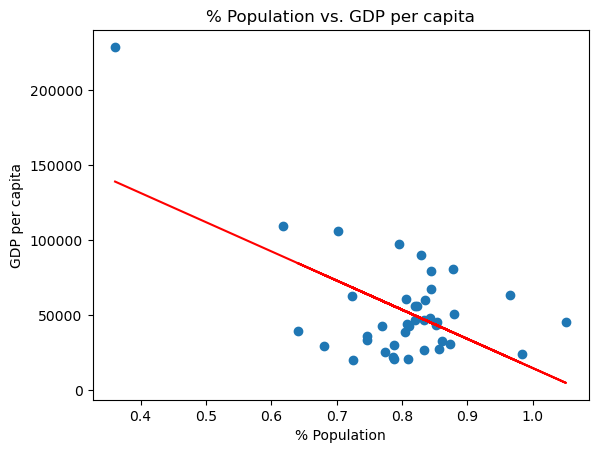

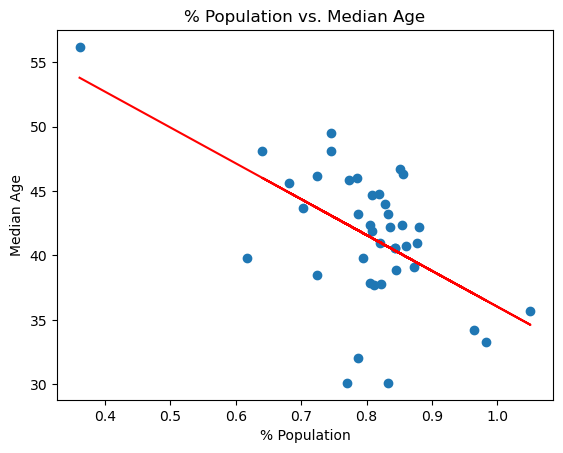

In [33]:
# Specify the new directory path
Path = "../data/"

# Study data files
GDP_csv = (f'{Path}GDP per capita (constant 2015 US$).csv')
age_csv = (f'{Path}age.csv')
social_media_csv = (f'{Path}social-media-users-by-country-2024.csv') 
pop_csv = (f'{Path}pop.csv')


# In[4]:


# Generate population DataFrame from csv file
raw_GDP_data = pd.read_csv(GDP_csv)

# Take the columns we want
raw_GDP_data = raw_GDP_data[["Country Name", "2022 [YR2022]"]]

# Remove invalid entries (NaN)
raw_GDP_data = raw_GDP_data.dropna()

# Specify the name to delete
name_to_delete = "GNI per capita (constant 2015 US$)"

# Read the CSV file
with open("..\country_data\GDP per capita (constant 2015 US$).csv", 'r', newline='') as file:
    reader = csv.reader(file)
    data = [row for row in reader if row[0] != name_to_delete]

# Write the filtered data to a new CSV file
with open("..\country_data\GDP per capita (constant 2015 US$).csv", 'w', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerows(data)

GDP_data = raw_GDP_data.rename(columns={"Country Name": f"Country",
                                           "2022 [YR2022]": f"GDP per capita"})


# Convert "GDP per capita" column to numeric values
GDP_data["GDP per capita"] = pd.to_numeric(GDP_data["GDP per capita"], errors='coerce')

# Filter for GDP values of 20,000 or higher
GDP_data_final = GDP_data.loc[GDP_data["GDP per capita"] >= 20000]

GDP_data_final.head()


# In[5]:


# Generate age DataFrame from csv file
raw_age_data = pd.read_csv(age_csv)

# Take the columns we want
raw_age_data = raw_age_data[["country", "MedianAge2023"]]

# Remove invalid entries (NaN)
raw_age_data = raw_age_data.dropna()

# Rename columns
age_data = raw_age_data.rename(columns={"country": f"Country",
                                        "MedianAge2023": f"Median Age"})

# Median Age of 20 or higher:
age_data_final = age_data.loc[age_data["Median Age"] >= 20]

age_data_final 


# In[6]:


# Generate population DataFrame from csv file
raw_SM_data = pd.read_csv(social_media_csv)

# Take the columns we want
raw_SM_data = raw_SM_data[["country", "SocialMediaUsersTotal2023"]]

# Remove invalid entries (NaN)
raw_SM_data = raw_SM_data.dropna()

# Rename columns
SM_data = raw_SM_data.rename(columns={"country": f"Country",
                                          "SocialMediaUsersTotal2023": f"Social Media Users"})

SM_data


# In[7]:


# Generate population DataFrame from csv file
raw_pop_data = pd.read_csv(pop_csv, encoding='unicode_escape')

# Remove unnecessary columns
raw_pop_data = raw_pop_data[["Country (or dependency)", "Population"]]

# Remove invalid entries (NaN)
pop_data = raw_pop_data.dropna()

# Rename columns
pop_data = raw_pop_data.rename(columns={"Country (or dependency)": f"Country",
                                          "Population": f"Population"})

# Remove the row at index 1 using iloc
pop_data = pop_data.drop(pop_data.index[0])

pop_data


# In[8]:


# Combine the data into a single DataFrame
merged_df = GDP_data_final.merge(age_data_final, how="inner", on=["Country"]).merge(SM_data, how="inner", on=["Country"]).merge(pop_data, how="inner", on=["Country"])

# Convert columns to numeric types
merged_df["Social Media Users"] = pd.to_numeric(merged_df["Social Media Users"], errors='coerce')
merged_df["GDP per capita"] = pd.to_numeric(merged_df["GDP per capita"], errors='coerce')


# Convert columns to numbers
merged_df["Population"] = merged_df["Population"].replace({'\$':'',',':''}, regex = True)
merged_df["Population"] = merged_df["Population"].astype(int)


# Display the data table for preview
merged_df.head()


# In[9]:


# Drop rows with missing values
merged_df.dropna(subset=["Social Media Users", "GDP per capita", "Median Age", "Population"], inplace=True)
merged_df.head()


# In[10]:


# percentage of total population utilizing social media
merged_df["% Population"] = merged_df["Social Media Users"] / merged_df["Population"]
merged_df.head()


# In[11]:


# Calculate line of best fit
def create_scatter1 (df, x_value , y_value, coords = (0,0)) : 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_value], df[y_value])
    regress_values = df[x_value] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    
    # Plot data
    plt.scatter(df[x_value], df[y_value])
    
    # Add line of best fit
    plt.plot(df[x_value],regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=12,color="red")
    
    # Label chart
    plt.title(f"{x_value} vs. {y_value}")
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
    plt.savefig("Chart Images") 
    plt.show()

create_scatter1(merged_df, "% Population", "GDP per capita", (600000000, 200000))


# In[12]:


# Calculate line of best fit
def create_scatter2 (df, x_value , y_value2, coords = (0,0)) : 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_value], df[y_value2])
    regress_values = df[x_value] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    
    # Plot data
    plt.scatter(df[x_value], df[y_value2])
    
    # Add line of best fit
    plt.plot(df[x_value],regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=12,color="red")
    
    # Label chart
    plt.title(f"{x_value} vs. {y_value2}")
    plt.xlabel(x_value)
    plt.ylabel(y_value2)
    plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
    plt.savefig("Chart Images") 
    plt.show()

create_scatter2(merged_df, "% Population", "Median Age", (600000000, 200000))

C:\Users\3aama\AppData\Local\Temp\ipykernel_6076\423701080.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  internet_usage_world['Internet Usage Change (%)'] = internet_usage_world['Internet Usage (%)'].pct_change() * 100


Year-to-Year Change in Internet Usage (%):
2014      NaN
2015     6.31
2016     7.32
2017     5.38
2018     7.94
2019     9.34
2020    10.83
2021     5.88
2022     0.00
Name: Internet Usage Change (%), dtype: float64

Year-to-Year Change in Social Media Users (%):
Year
2014    11.9
2015    11.0
2016    20.9
2017    14.6
2018     8.3
2019     7.2
2020    13.2
2021    10.1
2022     3.0
Name: Social Media Users Change (%), dtype: float64


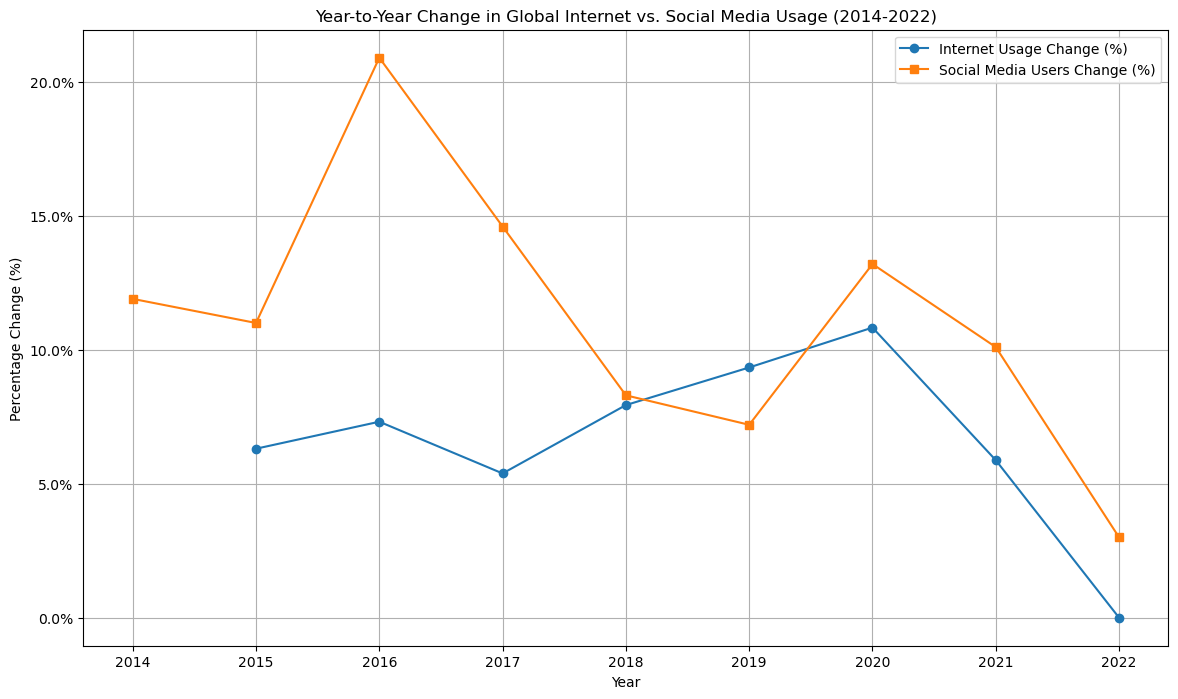

In [11]:
# Function to load and clean internet usage data
def load_internet_usage_data(filepath):
    internet_usage_df = pd.read_csv(filepath, skiprows=4)
    columns = ['Country Name'] + [str(year) for year in range(2014, 2023)]  # Focus on 2014 to 2022
    internet_usage_df = internet_usage_df[columns]
    internet_usage_world = internet_usage_df[internet_usage_df['Country Name'] == 'World']
    internet_usage_world = internet_usage_world.drop('Country Name', axis=1).transpose()
    internet_usage_world.columns = ['Internet Usage (%)']
    internet_usage_world['Internet Usage (%)'] = pd.to_numeric(internet_usage_world['Internet Usage (%)'], errors='coerce')
    internet_usage_world.index = internet_usage_world.index.map(int)
    internet_usage_world['Internet Usage Change (%)'] = internet_usage_world['Internet Usage (%)'].pct_change() * 100
    return internet_usage_world

# Function to prepare social media usage data
def prepare_social_media_usage_data():
    social_media_usage_data = {
        'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],  # Focus on 2014 to 2022
        'Social Media Users (Millions)': [1857, 2078, 2307, 2789, 3196, 3461, 3709, 4199, 4623],
        'Percentage Changes': [11.9, 11.0, 20.9, 14.6, 8.3, 7.2, 13.2, 10.1, 3.0]  # Matching the years
    }
    social_media_usage_df = pd.DataFrame(social_media_usage_data).set_index('Year')
    social_media_usage_df['Social Media Users Change (%)'] = social_media_usage_df['Percentage Changes']
    return social_media_usage_df

# Function to plot both datasets
def plot_data(internet_usage, social_media_usage):
    plt.figure(figsize=(14, 8))
    plt.plot(internet_usage.index, internet_usage['Internet Usage Change (%)'], label='Internet Usage Change (%)', marker='o')
    plt.plot(social_media_usage.index, social_media_usage['Social Media Users Change (%)'], label='Social Media Users Change (%)', marker='s')
    plt.title('Year-to-Year Change in Global Internet vs. Social Media Usage (2014-2022)')
    plt.xlabel('Year')
    plt.ylabel('Percentage Change (%)')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(2014, 2023))
    # Ensure y-axis labels are formatted as percentage
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
    plt.show()

# Function to display year-to-year change tables
def display_change_tables(internet_usage, social_media_usage):
    print("Year-to-Year Change in Internet Usage (%):")
    print(internet_usage['Internet Usage Change (%)'].round(2))
    print("\nYear-to-Year Change in Social Media Users (%):")
    print(social_media_usage['Social Media Users Change (%)'])

# Main execution flow
if __name__ == "__main__":
    internet_usage_world = load_internet_usage_data('../data/API_IT.NET.USER.ZS_DS2_en_csv_v2_43762.csv')
    social_media_usage_df = prepare_social_media_usage_data()

    display_change_tables(internet_usage_world.loc[2014:2022], social_media_usage_df)
    plot_data(internet_usage_world.loc[2014:2022], social_media_usage_df)